# Notebook Examples

In [1]:
import dtlpy as dl

## Create a project

In [2]:
project = dl.projects.create(project_name='Pigs')

## Print a project

In [3]:
project.print()


+----+---------------------+-----------------------+--------------------------------------+---------+-------+
|    | createdAt           | creator               | id                                   | name    | org   |
|----+---------------------+-----------------------+--------------------------------------+---------+-------|
|  0 | 2019-07-31 12:01:36 | oa-test-1@dataloop.ai | 023a227a-7343-45a4-a657-2c3b49785c0a | b'Pigs' |       |
+----+---------------------+-----------------------+--------------------------------------+---------+-------+


## Create a dataset

In [4]:
dataset = project.datasets.create(dataset_name='My_Dataset')

## Print a dataset

In [5]:
dataset.print()


+----+--------------------------+---------------+-------------+-----------------------+------------------------------------------+--------------+
|    | id                       | name          |   annotated | creator               | projects                                 |   itemsCount |
|----+--------------------------+---------------+-------------+-----------------------+------------------------------------------+--------------|
|  0 | 5d4183239e92cf4a0af8b20a | b'My_Dataset' |           0 | oa-test-1@dataloop.ai | ['023a227a-7343-45a4-a657-2c3b49785c0a'] |            0 |
+----+--------------------------+---------------+-------------+-----------------------+------------------------------------------+--------------+


## Upload items to dataset

In [6]:
# item_paths
paths= [
    '/Users/aharonlouzon/Desktop/Dataloop/SDK/Aharon/flower.jpg',  # single image path
    '/Users/aharonlouzon/Desktop/Dataloop/SDK/Aharon/dogs',       # directory path - will e uploaded to platform with directory
    '/Users/aharonlouzon/Desktop/Dataloop/SDK/Aharon/cats/*'      # directory content - only directory content will be uploaded
]

# upload
items = dataset.items.upload(
    local_path=paths,               # local paths to upload
    local_annotations_path=None,    # local annotations path if exist
    file_types=['.jpg'],              # what file types? default - all
    relative_path=True,             # upload with local relative path
    overwrite=True                  # overwrite existing items in platform
)

 [Elapsed Time: 0:00:01] |###################################| (Time:  0:00:01)


## Edit item metadata

In [7]:
# upload item
local_path = '/Users/aharonlouzon/Desktop/Dataloop/SDK/Aharon/flower.jpg'
item = dataset.items.upload(local_path=local_path)

# modify metadata
item.metadata['user'] = dict()
item.metadata['user']['MyKey'] = 'MyVal'

# update and reclaim item
item = item.update()

 [Elapsed Time: 0:00:00] |###################################| (ETA:  00:00:00)


## Edit dataset labels

In [8]:
# get recipe
recipe = dataset.recipes.list()[0]
# or get specific recipe:
# recipe = dataset.recipes.get(recipe_id='id')

# get ontology
ontology = recipe.ontologies.list()[0]
# or get specific ontology:
# ontology = recipe.ontologies.get(ontology_id='id')

# add one label
ontology.add_label(label_name='dog', color=(35, 234, 123))

# add a list of labels
labels = [{'tag': 'eye', 'color': (1, 1, 1)}, {'tag': 'hat', 'color': (34, 56, 7)},
          {'tag': 'face', 'color': (100, 14, 150)}]
ontology.add_labels(label_list=labels)

# after adding - update ontology
ontology = ontology.update()

## Annotations

### Upload annotations

In [9]:
# upload item
# local path to item
local_item_path = '/Users/aharonlouzon/Desktop/Dataloop/SDK/Aharon/images/lena.png'
# local path to annotations
local_annotation_path = '/Users/aharonlouzon/Desktop/Dataloop/SDK/Aharon/annotations.json'

# upload item
item = dataset.items.upload(local_path=local_path)

# upload annotations
annotations = item.annotations.upload(annotations=local_annotation_path)

 [Elapsed Time: 0:00:00] |###################################| (ETA:  00:00:00)


### Get annotations

In [10]:
annotations = item.annotations.list()

### Show annotations

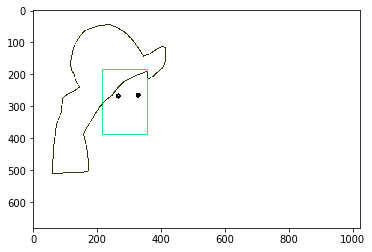

In [13]:
mask = annotations.show(annotation_format='mask')

# import ndarray image viewer
import matplotlib.pyplot as plt

# show mask
plt.figure()
plt.imshow(mask.astype('uint8'))
plt.show()

### Edit annotation

In [14]:
annotation = annotations[0]
annotation.attributes = ['leftEye']
annotation = annotation.update()

## Move item

In [15]:
# destination folder
dst_folder = '/fighting_shredder'

# move
item = item.move(new_path=dst_folder)

## Use Filters

In [16]:
# create filters 
filters = dl.Filters()
# set resource
filters.resource = 'items'
# add filter - only files
filters.add(field='type', values='file')
# add filter - only annotated items
filters.add(field='annotated', values=True)
# add filter - filename includes 'dog'
filters.add(field='filename', values='*dog*')
# add filter - created since June 2019
filters.add(field='createdAt', values='01/06/2019', operator='gt')

# get filtered items
# return results sorted by ascending id 
filters.sort_by(field='filename')
pages = dataset.items.list(filters=filters)

## Converter

### Create conversion function

In [17]:
# custom conversion function
# converts 1 dataloop annotation to custom format annotation
# returns converted annotation
def my_converter(annotation):
    """
    :param annotation: dataloop Annotation object
    :return: format of new annotation
    """
    ann = {'tagName': annotation.label, 'annotationType': annotation.type, 'coordinates': annotation.coordinates}
    return ann

### Convert using dl converter

In [18]:
annotations = item.annotations.list()
converter = dl.Converter()
converted_annotations = converter.convert(annotations=annotations,
                                          from_format='dataloop',
                                          to_format='my_format',
                                          conversion_func=my_converter)

## Ontology and Recipe

### Relations

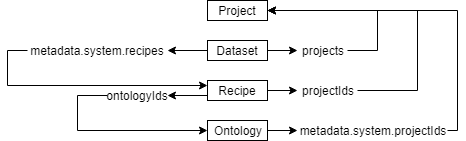

In [8]:
from IPython.display import Image 
Image(filename='../dtlpy/assets/project_dataset_recipe_ontology.png')

### Copy Ontology Between Projects

In [13]:
import dtlpy as dl
dl.setenv('prod')
# get the ORIGIN project and dataset
from_dataset = dl.projects.get('orgPrg').datasets.get('orgDset')
# get all recipes
from_recipes = from_dataset.recipes.list()
from_recipes.print()


+----+--------------------------+----------------+---------------+------------------------------+------------------------------+------------------------------------------+---------------------+-------------------------+-----------------+
|    | id                       | instructions   | description   | ontologyIds                  | title                        | projectIds                               | creator             | examples                | customActions   |
|----+--------------------------+----------------+---------------+------------------------------+------------------------------+------------------------------------------+---------------------+-------------------------+-----------------|
|  0 | 5d83a5ae2ef3700385aaac35 | []             |               | ['5d83a5ae2ef3702424aaac34'] | first_dataset Default Recipe | ['bcfd4730-502a-4e98-91e2-6a75f38a850c'] | shmulik@dataloop.ai | {'good': [], 'bad': []} | []              |
+----+--------------------------+--------------

In [19]:
# get the recipe to copy and list ontologies
from_ontologies = from_recipes[0].ontologies.list()
# finally, get the ontology to copy
from_ontology = from_ontologies[0]
for label in from_ontology.labels:
    print(label)

Label(tag='flower1', color='#d25ad1', display_label='Flower1', attributes=['yellow'], children=[Label(tag='yellow', color='#d43c64', display_label='Yellow', attributes=[], children=[])])
Label(tag='flower2', color='#d25ad1', display_label='Flower2', attributes=[], children=[])
Label(tag='flower3', color='#d25ad1', display_label='Flower3', attributes=[], children=[])


In [21]:
# get the DESTINATION project and dataset
to_dataset = dl.projects.get('dstPrg').datasets.get('dstDset')
# get all recipes
to_recipes = to_dataset.recipes.list()
to_recipes.print()


+----+--------------------------+----------------+---------------+------------------------------+------------------------+------------------------------------------+----------------+-------------------------+-----------------+
|    | id                       | instructions   | description   | ontologyIds                  | title                  | projectIds                               | creator        | examples                | customActions   |
|----+--------------------------+----------------+---------------+------------------------------+------------------------+------------------------------------------+----------------+-------------------------+-----------------|
|  0 | 5d8b191117384c4f1e31ec2f | []             |               | ['5d8b191150510e6df61792fd'] | dstDset Default Recipe | ['f1aee429-d6e3-48c2-843a-05c0da327634'] | or@dataloop.ai | {'good': [], 'bad': []} | []              |
+----+--------------------------+----------------+---------------+-------------------------

In [24]:
# get the recipe to copy and list ontologies
to_ontologies = to_recipes[0].ontologies.list()
# finally, get the ontology to edit
to_ontology = to_ontologies[0]
to_ontology.print()


+----+--------------------------+----------+---------+----------------+
|    | id                       | labels   | roots   | creator        |
|----+--------------------------+----------+---------+----------------|
|  0 | 5d8b191150510e6df61792fd | []       | []      | or@dataloop.ai |
+----+--------------------------+----------+---------+----------------+


In [26]:
# now we set the new relations to the origin ontology so that the ids will match out new ids
from_ontology.id = to_ontology.id
from_ontology.metadata['system']['projectIds'] = to_ontology.metadata['system']['projectIds']
# update the DESTINATION ontology 
from_ontology = from_ontology.update(system_metadata=True)

In [30]:
# print the destination ontology to check
to_ontology = to_recipes[0].ontologies.get(ontology_id='5d8b191150510e6df61792fd')
for label in to_ontology.labels:
    print(label)

Label(tag='flower1', color='#d25ad1', display_label='Flower1', attributes=['yellow'], children=[Label(tag='yellow', color='#d43c64', display_label='Yellow', attributes=[], children=[])])
Label(tag='flower2', color='#d25ad1', display_label='Flower2', attributes=[], children=[])
Label(tag='flower3', color='#d25ad1', display_label='Flower3', attributes=[], children=[])
